# Week 3 Exercise

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Newton's method Continue

1) Does this method guarantee solution for any function and any guess?

no, if $ f'(x_n) $ approach 0 or $e_n > 1$

2) What are pros and cons of Newtons' Method vs bisection?

    Newton is very faster but Bisection guarantee the solution.

3) What exactly does quadratic convergence mean?

    The next error term decrease by the power of 2

## Numerical Derivative

1) Let $f(x) = x^3$ analytically calculate $f'(0.5)$.

In [1]:
# 3 x^2
print 3 * (0.5)**2

0.75


2) Use forward finite difference to approximate $f'(0.5)$ with $h=0.1$

In [2]:
def f(x):
    return x**3
h = 0.1
print (f(0.5+h)-f(0.5))/h

0.91


3) Use forward finite difference to approximate $f'(0.5)$ with $h=0.001$

In [4]:
def f(x):
    return x**3
h = 0.001
print (f(0.5+h)-f(0.5))/h

0.751501


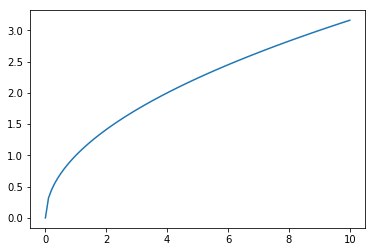

In [70]:
xs = np.linspace(0,10,100)
fx = [math.sqrt(x) for x in xs]

plt.plot(xs,fx)

3.1) Plot $f'(x)$ for h = 0.1 and h = 0.001

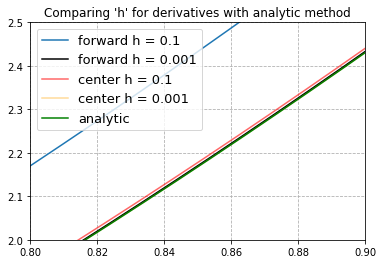

In [37]:
def f(x):
    return x**3

def analytic_f(x):
    return 3*(x**2)

def forward_dfx(f,x,h):
    return (f(x+h)-f(x))/h

def center_dfx(f,x,h):
    return (f(x+h) - f(x-h))/(2*h)

xs = np.linspace(0,1,1000)
#Forward method
f_big_h = [forward_dfx(f, x,0.1) for x in xs]
f_small_h = [forward_dfx(f, x,0.001) for x in xs]
#Center Method
c_small_h = [center_dfx(f,x,0.1) for x in xs]
c_big_h = [center_dfx(f,x,0.001) for x in xs]
#Analytically
analytic = [analytic_f(x) for x in xs]

plt.title("Comparing 'h' for derivatives with analytic method")
plt.plot(xs,f_big_h,label="forward h = 0.1")
plt.plot(xs,f_small_h,label="forward h = 0.001",c='black')
plt.plot(xs,c_small_h,label="center h = 0.1",c='r',alpha=0.6)
plt.plot(xs,c_big_h,label="center h = 0.001",c='orange',alpha=0.4)
plt.plot(xs,analytic,label="analytic",c='g')
plt.legend(fontsize=13)
plt.xlim(0.8,0.9)
plt.ylim(2,2.5)
plt.grid(ls = '--')

4) Use centered finite difference to approximate $f'(0.5)$ with $h=0.1$

In [5]:
h = 0.1
print (f(0.5+h)-f(0.5-h))/(2*h)

0.76


5) Use centered finite difference to approximate $f'(0.5)$ with $h=0.001$

In [6]:
h = 0.001
print (f(0.5+h)-f(0.5-h))/(2*h)

0.750001


6) Which one is a better approach? How do we quantify it?

7) Derive a formula which will give you an even more accurate result.

6) Let $f(x) = \sin(x)$ analytically know that $f'(x)=\cos(x)$. Plot $\cos(x)$ along with the derivative of $\sin(x)$ obtained from finite difference. Pick a reasonable value for $h$ and plotting range.

7) Find $f''(0.5)$ for $f(x) = x^5$ using centered finite difference for $h=0.05$

8) Given that formula what is the convergence rate?

9) What can go wrong if $h$ is really really small?

when h is too small,  $f(x+h) - f(x)$  will be very small, hence lead to larger error.

# Newton's method with numerical derivative

1) Write a function
```def newton(f, start, n):```
that try to find solution of $f(x)=0$ given starting point at $x = start$ for n iteration. But this time you don't need to do $f'(x)$ by hands.

Try it on our usual suspect: solving $x = \cos(x)$



In [45]:
def newton(f, start, n):
    x = start
    def d_dx(x,h):
        return (f(x+h) - f(x-h)) / (2*h)
    for i in range(n):
        x = x - (f(x)/d_dx(x,1e-4))
    return x

def f(x): return math.cos(x) - x

print(newton(f,0,5))

0.7390851332151607


# Edge Detection (probably gonna be part of your homework)

1) Read in Mario.png
```
im = plt.imread(filename)
plt.imshow(im)
```

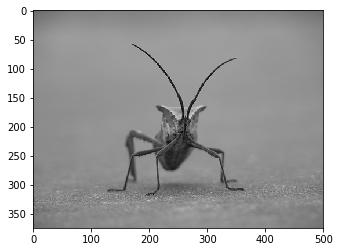

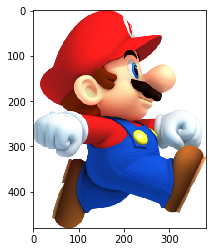

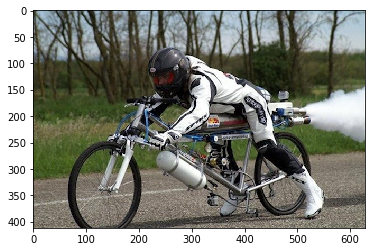

In [6]:
stinkbug = plt.imread('stinkbug.png')
mario = plt.imread('mario.png')
rocket = plt.imread('rocket-bicycle.png')
plt.imshow(stinkbug)
plt.figure()
plt.imshow(mario)
plt.figure()
plt.imshow(rocket)

In [59]:
print (stinkbug)


[[ 0.40784314  0.41176471  0.41568628 ...,  0.55686277  0.55686277
   0.55686277]
 [ 0.40784314  0.41176471  0.41568628 ...,  0.55686277  0.55686277
   0.55686277]
 [ 0.40784314  0.41176471  0.41568628 ...,  0.55686277  0.55686277
   0.55686277]]


2) The dimension of each output is the following: Can you guess what each dimension means?

or read this http://matplotlib.org/api/image_api.html

In [53]:
print (stinkbug.shape)
print (mario.shape)
print (rocket.shape)

(375, 500, 3)
(480, 381, 4)
(412, 628, 3)


3) Try to get a pixel on mario hat. It should be really close to red [1,0,0,1]. Note that the first dimesion is actually y not x.
```
    mario[y,x]
```

In [17]:
print mario[50,170]
print mario[50,170]Nuttapat

[ 1.          0.12941177  0.12156863  1.        ]
[ 1.          0.12941177  0.12156863  1.        ]


3.1) You can make a big blob in the image too
```
    mario [10:20,30:40] = np.array([0,1,0,1]) #green
```
this changes the image array where the first index is 10 to 20 and second index from 30 to 40 all to green. This is called chunk assignment. Quite convenient.

Try imshow after you edit. If you need to reset mario, do 
```
mario = plt.imread('mario.png')
```


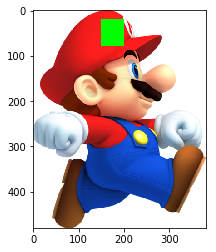

In [60]:
mario [20:80,150:200] = np.array([0,1,0,1])
plt.imshow(mario)

4) What defines an edge? What quantity distinguish the pixel in the middle of the hat and the pixel separating the hat and his ear?

5) Write a function that given location $y,x$ and then calculate how "likely" it is that pixel x,y is an edge pixel.

In [62]:
def edge(pic, y, x):
    def difference(orig, surr):
        return np.sum((orig-surr)**2)

    #original
    center = pic[y,x]
    #surroundings
    top   = pic[y-1][x]
    left  = pic[y,x-1]
    right = pic[y,x+1]
    bottom= pic[y+1,x]
    
    surroundings = [top,left,right,bottom]
    
    score = sum([difference(center,surr) for surr in surroundings])
    
    return score

6) Make an empty 3d array of (ydimension, xdimension, ncolor). Then start putting in each pixel with the size of gradient.

(480, 381, 4)


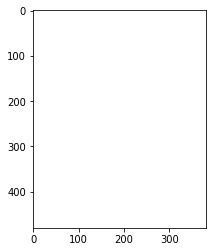

In [7]:
new_mario = np.zeros(mario.shape)
print(new_mario.shape)
plt.imshow(new_mario)

In [64]:
ny = new_mario.shape[0]
nx = new_mario.shape[1]

# exclude boundaries
for iy in range(1,ny-1):
    for ix in range(1,nx-1):
        score = edge(mario,iy,ix)
        new_mario[iy,ix] = np.array([score]*4)

7)Show the result.

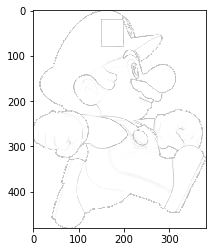

In [65]:
plt.imshow(new_mario)

8) Wrap all these in a function and try it on other images

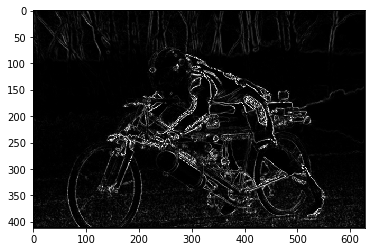

In [69]:
def makeEdge(img):
    def edge(pic, y, x):
        def difference(orig, surr):
            return np.sum((orig-surr)**2)

        #original
        center = pic[y,x]
        #surroundings
        top   = pic[y-1][x]
        left  = pic[y,x-1]
        right = pic[y,x+1]
        bottom= pic[y+1,x]

        surroundings = [top,left,right,bottom]

        score = sum([difference(center,surr) for surr in surroundings])

        return score

    new_img = np.zeros(img.shape)
#     print(new_mario.shape)

    ny = new_img.shape[0]
    nx = new_img.shape[1]

    # exclude boundaries
    for iy in range(1,ny-1):
        for ix in range(1,nx-1):
            score = edge(img,iy,ix)
            new_img[iy,ix] = np.array([score]*new_img.shape[2])
    plt.imshow(new_img)
    
makeEdge(rocket)